In [1]:
import pandas as pd
import numpy as np

cols = ['symboling',
        'normalized_losses',
        'make', 
        'fuel_type',
        'aspiration',
        'num_doors',
        'body_style',
        'drive_wheels',
        'engine_location',
        'wheel_base',
        'length',
        'width',
        'height',
        'curb_weight',
        'engine_type',
        'num_cylinders',
        'engine_size',
        'fuel_system',
        'bore',
        'stroke',
        'compression_ratio',
        'horsepower',
        'peak_rpm',
        'city_mpg',
        'highway_mpg',
        'price']

cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
numeric_cols = ['symboling',
        'normalized_losses',
        'wheel_base',
        'length',
        'width',
        'height',
        'curb_weight',
        'engine_size',
        'bore',
        'stroke',
        'compression_ratio',
        'horsepower',
        'peak_rpm',
        'city_mpg',
        'highway_mpg',
        'price']

numeric_cars = cars[numeric_cols]

numeric_cars.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
numeric_cars = numeric_cars.replace('?', np.nan)

numeric_cars.dtypes

symboling              int64
normalized_losses     object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [4]:
#Convert all columns to float
numeric_cars = numeric_cars.astype(float)
numeric_cars.dtypes

symboling            float64
normalized_losses    float64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight          float64
engine_size          float64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg             float64
highway_mpg          float64
price                float64
dtype: object

In [5]:
#Find any null values
numeric_cars.isnull().sum()

symboling             0
normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [6]:
#Remove any rows without a price (the value we'll be trying to predict)
numeric_cars = numeric_cars.dropna(subset=['price'])

numeric_cars.isnull().sum()

symboling             0
normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [7]:
#Replace the remaining null values with the column mean
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

numeric_cars.isnull().sum()

symboling            0
normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [8]:
#Normalize all columnns to range from 0 to 1 except the target column.
#Store price column before normalization
price_col = numeric_cars['price']

#Normalize all columns as a range from 0 to 1
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())

#Restore the target column (price)
numeric_cars['price'] = price_col

## Univariate Model

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#Function that encapsulates the training and simple validation process.
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #Randomize order of rows
    shuffle = np.random.permutation(df.index)
    random = df.reindex(shuffle)
    
    #Divide rows in half, first half is training and second half is testing
    divide_row = int(len(random) / 2)
    train_df = random.iloc[0:divide_row]
    test_df = random.iloc[divide_row:]
    
    #Fit the KNN model
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    #Predict using the model
    predictions = knn.predict(test_df[[train_col]])
    
    #Calculate and return the RMSE
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse

#Create a dictionary of the RMSE results
rmses = {}

#Create the training column list by dropping the price column
train_cols = numeric_cars.columns.drop('price')

#Train a model and return an RMSE value for each column, return the result to the RMSE dictionary
for col in train_cols:
    rmse = knn_train_test(col, 'price', numeric_cars)
    rmses[col] = rmse

#Convert the dictionary into a series
rmses_series = pd.Series(rmses)
rmses_series.sort_values()

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
symboling            7979.434920
stroke               8006.529545
height               8144.441043
dtype: float64

In [10]:
#Update the function to include a variable for the k value
def knn_train_test(train_col, target_col, df):
    
    #Randomize order of rows
    np.random.seed(1)
    shuffle = np.random.permutation(df.index)
    random = df.reindex(shuffle)
    
    #Divide rows in half, first half is training and second half is testing
    divide_row = int(len(random) / 2)
    train_df = random.iloc[0:divide_row]
    test_df = random.iloc[divide_row:]
    
    #Create a list of variables for K and a dictionary for K RMSE results
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    #Loop through the K values
    for k in k_values:
        #Fit the KNN model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        
        #Predict using the model
        predictions = knn.predict(test_df[[train_col]])
        
        #Calculate and return the RMSE
        k_rmses[k] = np.sqrt(mean_squared_error(test_df[target_col], predictions))
        
    return k_rmses

#Create a dictionary of the RMSE results for each K value
k_rmses_results = {}

#Create the training column list by dropping the price column
train_cols = numeric_cars.columns.drop('price')

#Train a model and return an RMSE value for each column, return the result to the RMSE dictionary
for col in train_cols:
    k_rmse_result = knn_train_test(col, 'price', numeric_cars)
    k_rmses_results[col] = k_rmse_result

k_rmses_results

{'symboling': {1: 8420.026461589143,
  3: 8736.916665985938,
  5: 7979.434919842381,
  7: 7884.532513187155,
  9: 7817.760486088469},
 'normalized_losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel_base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine_size': {1: 3258.4861059962027,
  3: 2840.5628056435

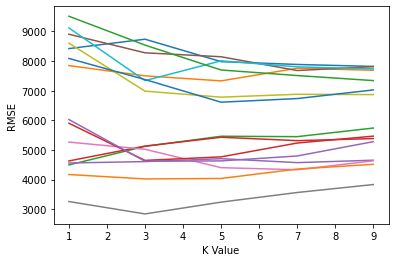

In [11]:
#Plot the results in a chart
import matplotlib.pyplot as plt
%matplotlib inline

#Loop through the dictionary, take x from the keys (V value) and y (RMSE) from the values for each feature.
for k,v in k_rmses_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('K Value')
    plt.ylabel('RMSE')

## Multivariate Model

In [12]:
#Find the best features for predicting price
#Create a dictionary to list the average RMSE
feature_avg_rmse = {}

#Loop through the K RMSE results and pull the average RMSE for each feature
for k,v in k_rmses_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
#Convert dictionary into series and sort
s_feature_avg_rmse = pd.Series(feature_avg_rmse)
s_feature_avg_rmse = s_feature_avg_rmse.sort_values()

In [16]:
#Update the function to allow for multiple training columns
def knn_train_test(train_cols, target_col, df):
    
    #Randomize order of rows
    np.random.seed(1)
    shuffle = np.random.permutation(df.index)
    random = df.reindex(shuffle)
    
    #Divide rows in half, first half is training and second half is testing
    divide_row = int(len(random) / 2)
    train_df = random.iloc[0:divide_row]
    test_df = random.iloc[divide_row:]
    
    #Use the default value for K and create a dictionary for K RMSE results
    k_values = [5]
    k_rmses = {}
    
    #Loop through the K values
    for k in k_values:
        #Fit the KNN model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        #Predict using the model
        predictions = knn.predict(test_df[train_cols])
        
        #Calculate and return the RMSE
        k_rmses[k] = np.sqrt(mean_squared_error(test_df[target_col], predictions))
        
    return k_rmses

#Create a dictionary for the best feature results
feature_results = {}

#Create a list of the best features found above
best_features = s_feature_avg_rmse.index

#Return the RMSE of using from 2 to 6 best features
for x in range(2,7):
    feature_results['{} best features'.format(x)] = knn_train_test(best_features[:x], 'price', numeric_cars)

feature_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

## Hyperparameter Tuning

In [18]:
#Update the function to allow for multiple K Values
def knn_train_test(train_cols, target_col, df):
    
    #Randomize order of rows
    np.random.seed(1)
    shuffle = np.random.permutation(df.index)
    random = df.reindex(shuffle)
    
    #Divide rows in half, first half is training and second half is testing
    divide_row = int(len(random) / 2)
    train_df = random.iloc[0:divide_row]
    test_df = random.iloc[divide_row:]
    
    #Use a range of values for K and create a dictionary for K RMSE results
    k_values = [i for i in range(1,25)]
    k_rmses = {}
    
    #Loop through the K values
    for k in k_values:
        #Fit the KNN model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        #Predict using the model
        predictions = knn.predict(test_df[train_cols])
        
        #Calculate and return the RMSE
        k_rmses[k] = np.sqrt(mean_squared_error(test_df[target_col], predictions))
        
    return k_rmses

#Create a dictionary for the best feature results
feature_results = {}

#Create a list of the best features found above
best_features = s_feature_avg_rmse.index

#Return the RMSE of using from 2 to 6 best features
for x in range(2,7):
    feature_results['{} best features'.format(x)] = knn_train_test(best_features[:x], 'price', numeric_cars)

feature_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

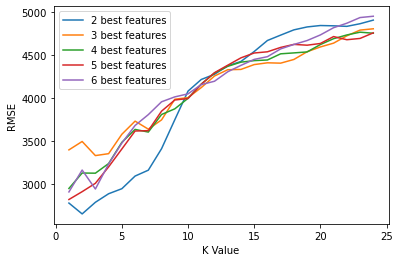

In [20]:
#Loop through the dictionary, to plot the results for each k value.
for k,v in feature_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label='{}'.format(k))

plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.legend()